<a href="https://colab.research.google.com/github/HyeonhoonLee/TSA_pandas/blob/master/02_Time_Resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Resampling
- 시계열 데이터의 인덱스는 시(hours), 분(minutes) 등 작은 단위 DateTime 인덱스로 이뤄진 경우도 많습니다.
- 더 넓은 주기로 데이터를 집계(aggregate) 해야 하는 경우 **Time Resampling**이 필요합니다.
- groupby를 사용함으로써 Time Resampling을 수행할 수는 있지만, 비지니스 도메인에서 분기나 회계년돌르 편리하게 처리할 방법은 못됩니다.
- Pandas는 이런 경우에 활용할 수 있는 frequency sampling 도구를 지원합니다.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 데이터 읽기; 한번에 인덱스화 해서 읽는 방법은 나중에 소개됩니다.
df = pd.read_csv('/content/drive/My Drive/Youtube_courses/TSA_pandas/data/apple_stock.csv')

In [5]:
## Datetime이 인덱스가 아니란 것을 확인할 수 있다.
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [6]:
## Date의 값들이 object type임을 확인할 수 있다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2265 non-null   object 
 1   High       2265 non-null   float64
 2   Low        2265 non-null   float64
 3   Open       2265 non-null   float64
 4   Close      2265 non-null   float64
 5   Volume     2265 non-null   float64
 6   Adj Close  2265 non-null   float64
dtypes: float64(6), object(1)
memory usage: 124.0+ KB


DatetimeIndex 아닌 RangeIndex 를 갖고 있으므로, Date 칼럼으로부터 DateTime 인덱스 생성.

In [7]:
df['Date'] = df['Date'].apply(pd.to_datetime)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2265 non-null   datetime64[ns]
 1   High       2265 non-null   float64       
 2   Low        2265 non-null   float64       
 3   Open       2265 non-null   float64       
 4   Close      2265 non-null   float64       
 5   Volume     2265 non-null   float64       
 6   Adj Close  2265 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 124.0 KB


Date 칼럼이 object 에서 datetime 으로 형변환됨.

In [9]:
## df 원본 자체를 바꿔주기 위해서 inplace = True 로 지정.
df.set_index('Date', inplace=True)

In [10]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


Datetime 타입의 인덱스 생성됨

monthly 혹은 yearly groupby 후 aggregation 할 때의 문제점.

In [11]:
## index에서 month를 꺼내서, df에다가 새로운 'month'칼럼을 추가해줍니다.
df['month'] = df.index.month

In [12]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,1
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,1
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369,1


In [13]:
df.groupby('month').agg(sum)

,High,Low,Open,Close,Volume,Adj Close
month,,,,,,
1,16141.351418,15840.451458,16007.617104,15989.401403,1.748822e+10,14038.491524
2,15739.942860,15445.045748,15572.844261,15607.478556,1.511651e+10,13799.143261
3,18676.318544,18358.607164,18522.812897,18516.759998,1.646522e+10,16387.278601
4,17763.422855,17444.350006,17612.804337,17595.992851,1.656252e+10,15549.686649
5,18874.642849,18552.902849,18711.531479,18731.747120,1.595049e+10,16741.255772
6,19040.630035,18743.354290,18909.838608,18881.168510,1.427367e+10,16927.685444
7,18908.574245,18616.531422,18760.998562,18775.181419,1.403693e+10,16779.291849
8,21322.417149,20943.891430,21113.692909,21152.527245,1.505109e+10,19060.226547
9,19596.267178,19222.517181,19423.325752,19400.800022,1.547466e+10,17478.810833


In [14]:
## 하지만 위와 같이 하면, 각 연도가 아닌 모든 연도의 1월,2월,~12월의 값들이 합해진다.
## 이는 우리가 원하는 형태가 아니다.
## 하지만 resample 함수를 사용하지 않고도, 아래와 같이 groupby만으로도 구분할 수 있긴 하다.

In [15]:
df.groupby(df.index.year).sum()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12
2010,9445.277117,9246.514246,9358.474289,9354.328560,3.775623e+10,6264.245874,1659
2011,13227.248539,12970.717155,13106.211399,13104.155712,3.101483e+10,8775.365667,1650
2012,20779.478600,20354.327164,20594.740028,20573.204269,3.299105e+10,14019.096821,1625
2013,17195.001381,16856.895695,17032.612881,17014.855690,2.560539e+10,13377.068882,1649
2014,23439.191429,23051.835686,23239.397186,23250.692886,1.591449e+10,21242.415085,1651
2015,30553.620010,29953.500031,30284.289993,30250.079948,1.306315e+10,28458.719048,1655
2016,26567.650009,26129.949989,26335.959984,26360.209991,9.680622e+09,25313.373260,1652
2017,38002.920044,37521.400078,37761.670013,37788.319946,6.810426e+09,36972.054916,1640


In [16]:
## multi-index로 groupby하여 구분하는 방법. (resample을 사용하지 않고..)
df.groupby([df.index.year, df.index.month]).agg(sum)

High          Low  ...    Adj Close  month
Date Date                            ...                    
2009 12      30.478571    30.080000  ...    20.159719     12
2010 1      573.331425   557.244289  ...   377.554930     19
     2      544.092857   532.875715  ...   361.342400     38
     3      738.235716   727.080000  ...   491.575537     69
     4      759.410004   744.359997  ...   504.554579     84
...                ...          ...  ...          ...    ...
2018 8     4934.909988  4860.029999  ...  4884.851288    184
     9     4266.080002  4181.480011  ...  4204.729004    171
     10    5150.640030  5011.109985  ...  5061.788559    230
     11    4072.939987  3962.709976  ...  4012.316437    231
     12    3179.080017  3075.930023  ...  3121.060028    228

[109 rows x 7 columns]

## resample()
시계열 데이터를 처리할 때 자주 하는 것 중 하나가 시간 인덱스를 기준으로 resampling 하는 것입니다. 그러기 위해 **resample** 메서드를 사용합니다.

#### timeseries [offset alias](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases) (중요): 이걸 알아야 resample()을 쓸 수 있다.

<table border="1" class="docutils">
<colgroup>
<col width="13%" />
<col width="87%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Alias</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>B</td>
<td>business day frequency</td>
</tr>
<tr class="row-odd"><td>C</td>
<td>custom business day frequency (experimental)</td>
</tr>
<tr class="row-even"><td>D</td>
<td>calendar day frequency</td>
</tr>
<tr class="row-odd"><td>W</td>
<td>weekly frequency</td>
</tr>
<tr class="row-even"><td>M</td>
<td>month end frequency</td>
</tr>
<tr class="row-odd"><td>SM</td>
<td>semi-month end frequency (15th and end of month)</td>
</tr>
<tr class="row-even"><td>BM</td>
<td>business month end frequency</td>
</tr>
<tr class="row-odd"><td>CBM</td>
<td>custom business month end frequency</td>
</tr>
<tr class="row-even"><td>MS</td>
<td>month start frequency</td>
</tr>
<tr class="row-odd"><td>SMS</td>
<td>semi-month start frequency (1st and 15th)</td>
</tr>
<tr class="row-even"><td>BMS</td>
<td>business month start frequency</td>
</tr>
<tr class="row-odd"><td>CBMS</td>
<td>custom business month start frequency</td>
</tr>
<tr class="row-even"><td>Q</td>
<td>quarter end frequency</td>
</tr>
<tr class="row-odd"><td>BQ</td>
<td>business quarter endfrequency</td>
</tr>
<tr class="row-even"><td>QS</td>
<td>quarter start frequency</td>
</tr>
<tr class="row-odd"><td>BQS</td>
<td>business quarter start frequency</td>
</tr>
<tr class="row-even"><td>A</td>
<td>year end frequency</td>
</tr>
<tr class="row-odd"><td>BA</td>
<td>business year end frequency</td>
</tr>
<tr class="row-even"><td>AS</td>
<td>year start frequency</td>
</tr>
<tr class="row-odd"><td>BAS</td>
<td>business year start frequency</td>
</tr>
<tr class="row-even"><td>BH</td>
<td>business hour frequency</td>
</tr>
<tr class="row-odd"><td>H</td>
<td>hourly frequency</td>
</tr>
<tr class="row-even"><td>T, min</td>
<td>minutely frequency</td>
</tr>
<tr class="row-odd"><td>S</td>
<td>secondly frequency</td>
</tr>
<tr class="row-even"><td>L, ms</td>
<td>milliseconds</td>
</tr>
<tr class="row-odd"><td>U, us</td>
<td>microseconds</td>
</tr>
<tr class="row-even"><td>N</td>
<td>nanoseconds</td>
</tr>
</tbody>
</table>

**resample** 호출 시 rule 파라메터를 입력해야 하는데, 입력한 rule 단위로 resampling 하게 됩니다. resampling 되어 리턴된 객체의 row 를 재조합하기 위해 aggregation 함수 (mean, sum, count, etc) 따위를 실행해서 결과를 도출합니다.

In [18]:
# Yearly Means
df.resample(rule='A').mean()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12.000000
2010-12-31,37.481258,36.692517,37.136803,37.120351,1.498263e+08,24.858119,6.583333
2011-12-31,52.489082,51.471100,52.008775,52.000618,1.230747e+08,34.822880,6.547619
2012-12-31,83.117914,81.417309,82.378960,82.292817,1.319642e+08,56.076387,6.500000
2013-12-31,68.234132,66.892443,67.589734,67.519269,1.016087e+08,53.083607,6.543651
2014-12-31,93.012664,91.475538,92.219830,92.264654,6.315273e+07,84.295298,6.551587
2015-12-31,121.244524,118.863095,120.175754,120.040000,5.183789e+07,112.931425,6.567460
2016-12-31,105.427183,103.690278,104.507778,104.604008,3.841516e+07,100.449894,6.555556
2017-12-31,151.406056,149.487650,150.444900,150.551075,2.713317e+07,147.299024,6.533865


In [19]:
df.resample('A').count()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,1,1,1,1,1,1,1
2010-12-31,252,252,252,252,252,252,252
2011-12-31,252,252,252,252,252,252,252
2012-12-31,250,250,250,250,250,250,250
2013-12-31,252,252,252,252,252,252,252
2014-12-31,252,252,252,252,252,252,252
2015-12-31,252,252,252,252,252,252,252
2016-12-31,252,252,252,252,252,252,252
2017-12-31,251,251,251,251,251,251,251


In [20]:
# 이렇게 resampling을 해야 추가적인 인덱싱(예: 2009)이 가능하다.
df.resample(rule='A').mean()['2009']

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.08,30.447144,30.104286,88102700.0,20.159719,12.0


### Custom Resampling

resampling 이후 호출할 함수를 임의로 만들 수도 있습니다.

In [21]:
def first_day(sample):
    """
    샘플링 기간에 상관 없이 기간 내 첫번째 데이터를 리턴
    """
    return sample[0]

In [22]:
df.resample(rule='A').apply(first_day)

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2011-12-31,47.180000,46.405716,46.520000,47.081429,111284600.0,31.528688,1
2012-12-31,58.928570,58.428570,58.485714,58.747143,75555200.0,39.340778,1
2013-12-31,79.285713,77.375717,79.117142,78.432854,140129500.0,55.923737,1
2014-12-31,79.575714,78.860001,79.382858,79.018570,58671200.0,67.251503,1
2015-12-31,111.440002,107.349998,111.389999,109.330002,53204600.0,101.963631,1
2016-12-31,105.370003,102.000000,102.610001,105.349998,67649400.0,99.925850,1
2017-12-31,116.330002,114.760002,115.800003,116.150002,28781900.0,112.620964,1


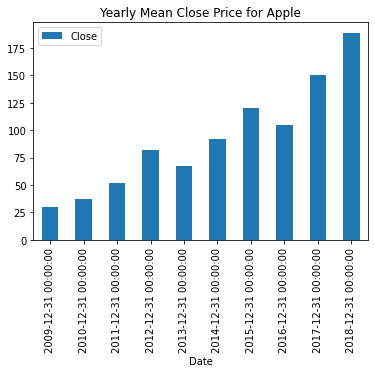

In [23]:
# 종가의 연평균을 바 차트로 그려본다.
# resample 함수 내에 'rule'이 첫번째 파라미터이므로 굳이 안써도된다.
df[['Close']].resample('A').mean().plot(kind='bar')
plt.title('Yearly Mean Close Price for Apple');
##df['Open']으로 해줘도 된다.

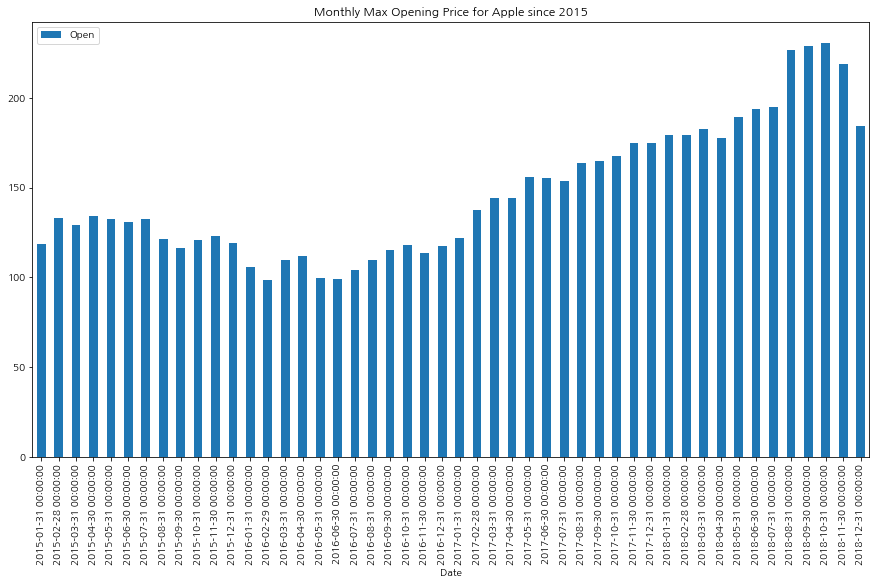

In [ ]:
# 오픈가격을 2015년 이후 월별 최댓값을 바차트로 그려본다. 
df[['Open']]['2015':].resample('M').max().plot(kind='bar', figsize=(15,8))
plt.title('Monthly Max Opening Price for Apple since 2015');

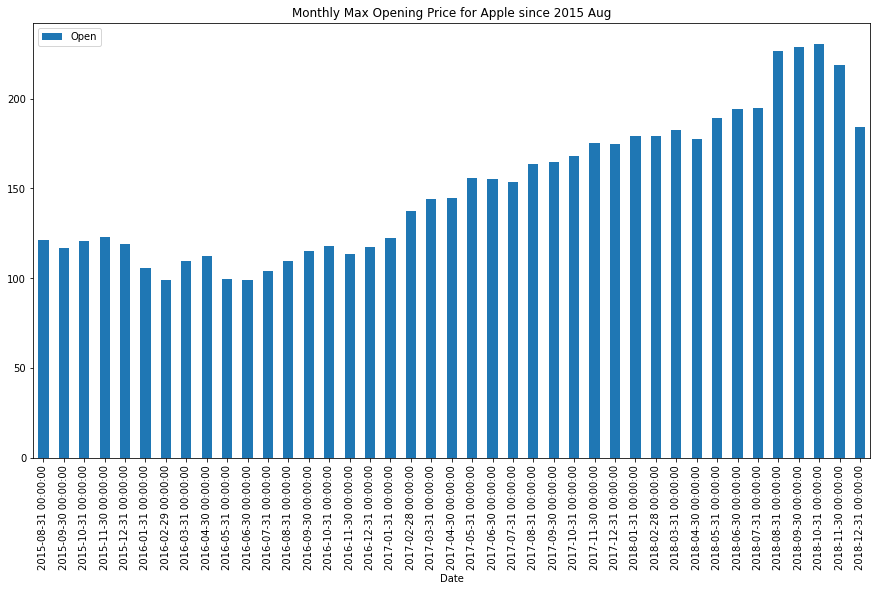

In [24]:
# 오픈가격을 2015년 '8월' 이후 월별 최댓값을 바차트로 그려본다. 
df[['Open']]['2015-8':].resample('M').max().plot(kind='bar', figsize=(15,8))
plt.title('Monthly Max Opening Price for Apple since 2015 Aug');
# ['2015-8'] 대신에 ['2015/8']도 가능하다.

In [25]:
from datetime import datetime

In [26]:
# 범위를 지정하여 datetime 인덱스 만들기.
## 'freq='에 offset alias를 입력할 수 있다.
## \는 줄바꿈 없음을 의미한다.
daily_daterange = \
pd.date_range(start=datetime(2018,9,1), 
              end=datetime(2019,1,24),
              freq='B')

In [27]:
daily_daterange

DatetimeIndex(['2018-09-03', '2018-09-04', '2018-09-05', '2018-09-06',
               '2018-09-07', '2018-09-10', '2018-09-11', '2018-09-12',
               '2018-09-13', '2018-09-14',
               ...
               '2019-01-11', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-21', '2019-01-22',
               '2019-01-23', '2019-01-24'],
              dtype='datetime64[ns]', length=104, freq='B')

In [28]:
daily_dataset = \
pd.DataFrame(
    data = {'value': np.random.rand(len(daily_daterange))},
    index=daily_daterange)

In [30]:
# 9월 8일과 9일은 주말이라 빠져있는 것을 알 수 있다.
daily_dataset.head(10)

,value
2018-09-03,0.581110
2018-09-04,0.203997
2018-09-05,0.346657
2018-09-06,0.411843
2018-09-07,0.280237
2018-09-10,0.536383
2018-09-11,0.622962
2018-09-12,0.729086
2018-09-13,0.659068
2018-09-14,0.434085


In [31]:
# 위 데이터프레임을 다시 resampling 해본다.
daily_dataset.resample('W-MON').min()

,value
2018-09-03,0.581110
2018-09-10,0.203997
2018-09-17,0.424645
2018-09-24,0.123222
2018-10-01,0.045512
2018-10-08,0.182272
2018-10-15,0.343415
2018-10-22,0.079834
2018-10-29,0.164004
2018-11-05,0.666837


In [32]:
# 마찬가지로 monthly로 resampling 해본다.
daily_dataset.resample('M').min()

,value
2018-09-30,0.045512
2018-10-31,0.079834
2018-11-30,0.160472
2018-12-31,0.005148
2019-01-31,0.008918
